In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

/Users/zakwanzahid/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [19]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [24]:
def adder(state: AgentState) -> AgentState:
    """ Adds three numbers together """

    state["finalNumber"] = state["number1"] + state["number2"]

    return state


def substractor(state: AgentState) -> AgentState:
    """ Subtracts the third number from the sum of the first two """

    state["finalNumber"] = state["number1"] - state["number2"]
    
    return state


def decide_next_node(state: AgentState) -> str:
    """ Decides which node to go to next based on the sum of first two numbers """

    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"
    


In [25]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", substractor)
graph.add_node("router", lambda state:state) #passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges("router", decide_next_node,
                        {
                            #Edge : Node
                            "addition_operation": "add_node",
                            "subtraction_operation": "subtract_node"
                        }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)


app = graph.compile()

 

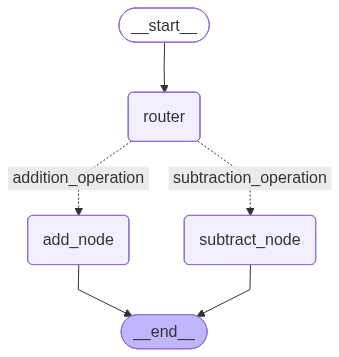

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [27]:
initial_state_1 =  AgentState(number1 = 10, number2 = 5, operation = "-")

print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


## Exercise

In [28]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalNumber: int
    finalNumber2: int


In [42]:
def adder(state: AgentState) -> AgentState:
    """ Adds three numbers together """

    state["finalNumber"] = state["number1"] + state["number2"]

    return state


def substractor(state: AgentState) -> AgentState:
    """ Subtracts the third number from the sum of the first two """

    state["finalNumber"] = state["number1"] - state["number2"]
    
    return state


def decide_next_node(state: AgentState) -> str:
    """ Decides which node to go to next based on the sum of first two numbers """

    if state["operation1"] == "+":
        return "addition_operation"
    elif state["operation1"] == "-":
        return "subtraction_operation"
    

def adder2(state: AgentState) -> AgentState:
    """ Adds three numbers together """

    state["finalNumber2"] = state["number3"] + state["number4"]
    print(state["finalNumber2"])

    return state


def substractor2(state: AgentState) -> AgentState:
    """ Subtracts the third number from the sum of the first two """

    state["finalNumber2"] = state["number3"] - state["number4"]
    print(state["finalNumber2"])
    
    return state
    

def decide_next_node1(state: AgentState) -> AgentState:
    """ Decides which node to go to next based on the sum of first two numbers """

    if state["operation2"] == "+":
        print("ADD1")
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"


In [43]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", substractor)
graph.add_node("router", lambda state:state) #passthrough function

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", substractor2)
graph.add_node("router2", lambda state:state) #passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges("router", decide_next_node,
                        {
                            #Edge : Node
                            "addition_operation": "add_node",
                            "subtraction_operation": "subtract_node"
                        }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges("router2", decide_next_node1,
                        {
                            #Edge : Node
                            "addition_operation2": "add_node2",
                            "subtraction_operation2": "subtract_node2"
                        }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

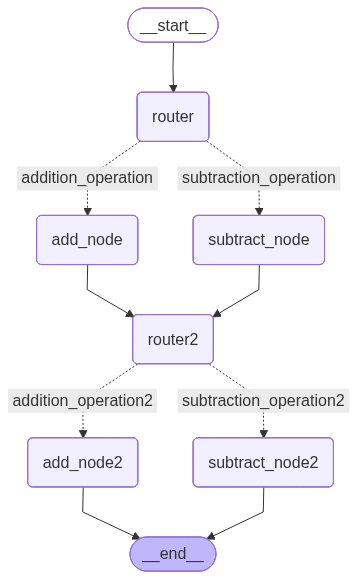

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [45]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)


In [46]:
print(app.invoke(initial_state))

ADD1
9
{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation1': '-', 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}
